In [2]:
from google.colab import files
uploaded = files.upload()


Saving DATAFORECONFINALPRO.xlsx to DATAFORECONFINALPRO.xlsx


In [3]:
import pandas as pd

df = pd.read_excel("DATAFORECONFINALPRO.xlsx")
print(df.head())


   Year  Sales_Billions  CPI (Nov)  CPI-YOY (Nov )
0  2024           984.3    316.449          2.7142
1  2023           955.6    308.087          3.1399
2  2022           920.0    298.708          7.1314
3  2021           878.4    278.824          6.8656
4  2020           781.2    260.911          1.1757


In [4]:
df.shape


(22, 4)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_excel("DATAFORECONFINALPRO.xlsx")

df["Sales_Billions"] = pd.to_numeric(df["Sales_Billions"], errors="coerce")
df["CPI-YOY (Nov )"] = pd.to_numeric(df["CPI-YOY (Nov )"], errors="coerce")   # updated name

reg = df[["Sales_Billions", "CPI-YOY (Nov )"]].copy()
reg = reg.dropna()
reg.describe()




,Sales_Billions,CPI-YOY (Nov )
count,21.000000,21.000000
mean,653.785714,2.603452
std,162.284088,1.767620
min,467.200000,0.436300
25%,526.000000,1.232900
50%,610.900000,2.092300
75%,716.700000,3.338600
max,984.300000,7.131400


In [6]:
reg[["Sales_Billions", "CPI-YOY (Nov )"]]



,Sales_Billions,CPI-YOY (Nov )
0,984.3,2.7142
1,955.6,3.1399
2,920.0,7.1314
3,878.4,6.8656
4,781.2,1.1757
5,716.7,2.0923
6,691.1,2.1473
7,678.9,2.1725
8,646.5,1.6843
9,627.6,0.4363


In [7]:
df.dtypes


,0
Year,int64
Sales_Billions,float64
CPI (Nov),float64
CPI-YOY (Nov ),float64


In [8]:
df["Sales_Billions"] = pd.to_numeric(df["Sales_Billions"], errors="coerce")
df["CPI (Nov)"] = pd.to_numeric(df["CPI (Nov)"], errors="coerce")
df["CPI-YOY (Nov )"] = pd.to_numeric(df["CPI-YOY (Nov )"], errors="coerce")
df.dtypes

,0
Year,int64
Sales_Billions,float64
CPI (Nov),float64
CPI-YOY (Nov ),float64


In [9]:
df_clean = df.dropna(subset=["CPI-YOY (Nov )", "Sales_Billions"])
print(df_clean.isna().sum())
x = df_clean["CPI-YOY (Nov )"]
y = df_clean["Sales_Billions"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

Year              0
Sales_Billions    0
CPI (Nov)         0
CPI-YOY (Nov )    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:         Sales_Billions   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.045
Date:                Sun, 07 Dec 2025   Prob (F-statistic):             0.0587
Time:                        23:40:33   Log-Likelihood:                -134.14
No. Observations:                  21   AIC:                             272.3
Df Residuals:                      19   BIC:                             274.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

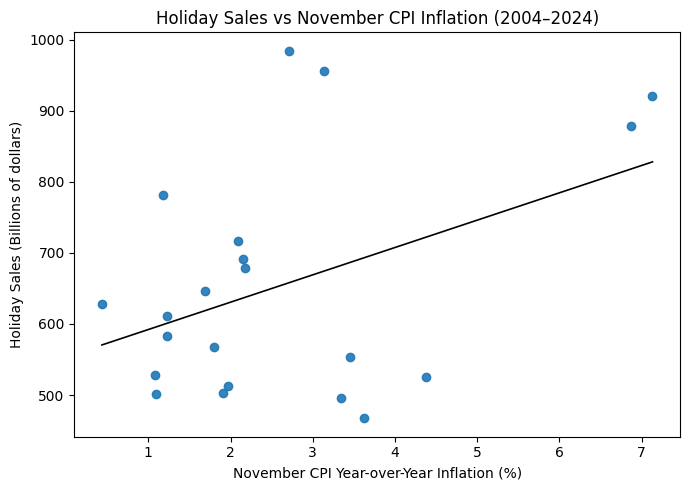

In [10]:
df_clean = df.dropna(subset=["CPI-YOY (Nov )", "Sales_Billions"])
X = df_clean["CPI-YOY (Nov )"]
y = df_clean["Sales_Billions"]
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
plt.figure(figsize=(7, 5))
plt.scatter(X, y, alpha=0.9)
x_grid = np.linspace(X.min(), X.max(), 110)
x_const = sm.add_constant(x_grid)
y_pred = model.predict(x_const)
plt.plot(x_grid, y_pred, color="black", linewidth=1.2)
plt.xlabel("November CPI Year-over-Year Inflation (%)")
plt.ylabel("Holiday Sales (Billions of dollars)")
plt.title("Holiday Sales vs November CPI Inflation (2004–2024)")
plt.tight_layout()
plt.show()

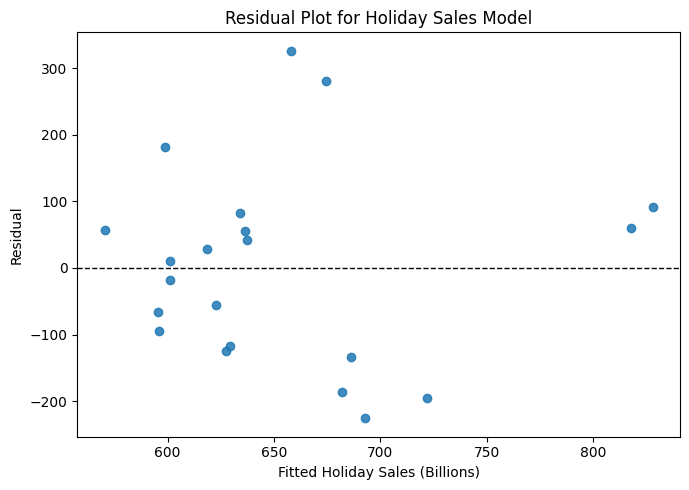

In [11]:
fitted_vals = model.fittedvalues
resids = model.resid
plt.figure(figsize=(7, 5))
plt.scatter(fitted_vals, resids, alpha=0.85)
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Fitted Holiday Sales (Billions)")
plt.ylabel("Residual")
plt.title("Residual Plot for Holiday Sales Model")
plt.tight_layout()
plt.show()

In [12]:
df = pd.read_excel("DATAFORECONFINALPRO.xlsx")
df["Sales_Billions"] = pd.to_numeric(df["Sales_Billions"], errors="coerce")
df["CPI-YOY (Nov )"] = pd.to_numeric(df["CPI-YOY (Nov )"], errors="coerce")
reg = df[["Sales_Billions", "CPI-YOY (Nov )"]].copy()
reg = reg.replace([np.inf, -np.inf], np.nan)
print(reg.isna().sum())
reg = reg.dropna()
print(reg.head())
X = reg["CPI-YOY (Nov )"]
y = reg["Sales_Billions"]
X = sm.add_constant(X)
ols_model = sm.OLS(y, X)
results = ols_model.fit()
print(results.summary())

Sales_Billions    0
CPI-YOY (Nov )    1
dtype: int64
   Sales_Billions  CPI-YOY (Nov )
0           984.3          2.7142
1           955.6          3.1399
2           920.0          7.1314
3           878.4          6.8656
4           781.2          1.1757
                            OLS Regression Results                            
Dep. Variable:         Sales_Billions   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.045
Date:                Sun, 07 Dec 2025   Prob (F-statistic):             0.0587
Time:                        23:40:41   Log-Likelihood:                -134.14
No. Observations:                  21   AIC:                             272.3
Df Residuals:                      19   BIC:                             274.4
Df Model:                           1                                         
Covariance Type:            nonr

In [13]:
df["dSales"] = df["Sales_Billions"].diff()
df["dInflation"] = df["CPI-YOY (Nov )"].diff()

In [14]:
df_diff = df.dropna(subset=["dSales", "dInflation"])

In [15]:
df_diff["Year_trend"] = range(len(df_diff))


/tmp/ipython-input-1436541759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff["Year_trend"] = range(len(df_diff))


In [16]:
X = df_diff[["dInflation", "Year_trend"]]
y = df_diff["dSales"]
X = sm.add_constant(X)
control_model = sm.OLS(y, X).fit()
print(control_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 dSales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     10.64
Date:                Sun, 07 Dec 2025   Prob (F-statistic):            0.00101
Time:                        23:40:47   Log-Likelihood:                -83.301
No. Observations:                  20   AIC:                             172.6
Df Residuals:                      17   BIC:                             175.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.7321      7.287     -6.413      0.0

In [17]:
X = df_diff["dInflation"]
y = df_diff["dSales"]
X = sm.add_constant(X)
diff_model = sm.OLS(y, X).fit()
print(diff_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 dSales   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     6.661
Date:                Sun, 07 Dec 2025   Prob (F-statistic):             0.0188
Time:                        23:40:49   Log-Likelihood:                -88.268
No. Observations:                  20   AIC:                             180.5
Df Residuals:                      18   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.1302      4.709     -5.549      0.0

In [18]:
df = df.sort_values("Year")


In [19]:
df["dSales"] = df["Sales_Billions"].diff()
df["dInflation"] = df["CPI-YOY (Nov )"].diff()


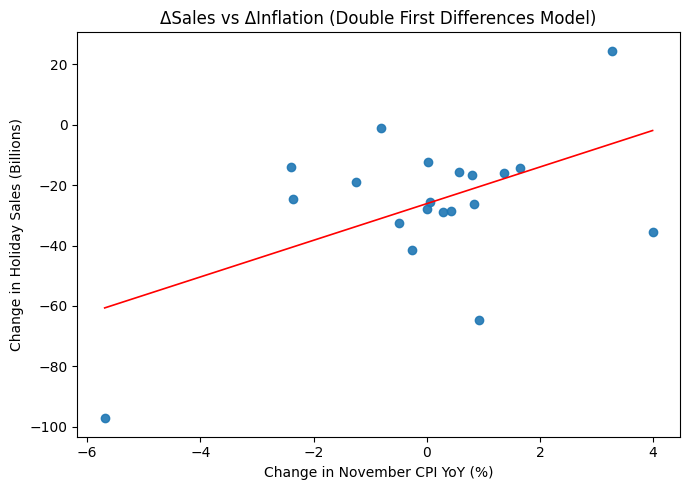

In [20]:
plt.figure(figsize=(7, 5))
plt.scatter(df_diff["dInflation"], df_diff["dSales"], alpha=0.9)
x_grid = np.linspace(df_diff["dInflation"].min(), df_diff["dInflation"].max(), 100)
x_grid_const = sm.add_constant(x_grid)
y_hat = diff_model.predict(x_grid_const)
plt.plot(x_grid, y_hat, color="red", linewidth=1.2)
plt.xlabel("Change in November CPI YoY (%)")
plt.ylabel("Change in Holiday Sales (Billions)")
plt.title("ΔSales vs ΔInflation (Double First Differences Model)")
plt.tight_layout()
plt.show()

In [21]:
print(df_diff[['dSales', 'dInflation']])


    dSales  dInflation
1    -28.7      0.4257
2    -35.6      3.9915
3    -41.6     -0.2658
4    -97.2     -5.6899
5    -64.5      0.9166
6    -25.6      0.0550
7    -12.2      0.0252
8    -32.4     -0.4882
9    -18.9     -1.2480
10   -16.7      0.7952
11   -27.8      0.0014
12   -15.5      0.5631
13   -14.3      1.6554
14   -24.5     -2.3669
15   -26.1      0.8301
16    -1.2     -0.8147
17    24.5      3.2734
18   -13.9     -2.4046
19   -16.1      1.3699
20   -28.8      0.2830


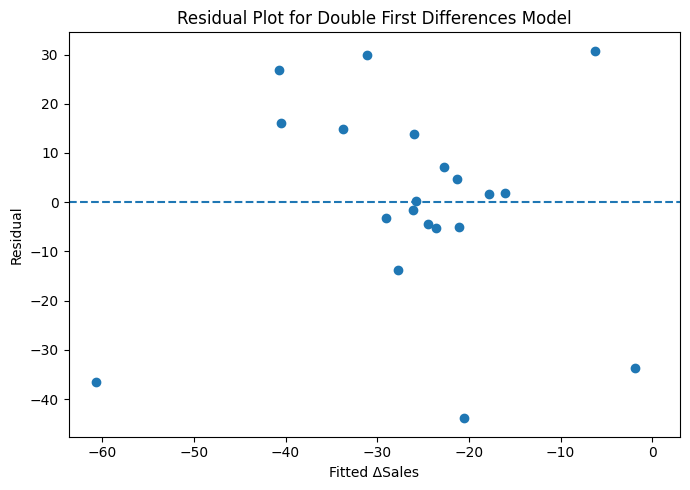

In [22]:
resid = diff_model.resid
fitted = diff_model.fittedvalues
plt.figure(figsize=(7,5))
plt.scatter(fitted, resid)
plt.axline((0,0), slope=0, linestyle="--")
plt.xlabel("Fitted ΔSales")
plt.ylabel("Residual")
plt.title("Residual Plot for Double First Differences Model")
plt.tight_layout()
plt.show()



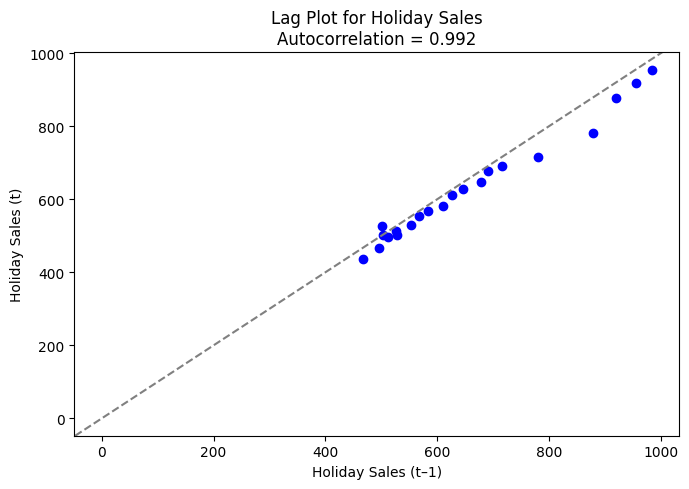

In [24]:
df = pd.read_excel("DATAFORECONFINALPRO.xlsx")
sales = df["Sales_Billions"]
sales_lag1 = sales.shift(1)
lagdf = pd.DataFrame({
    "sales_t": sales,
    "sales_tminus1": sales_lag1
}).dropna()
corr = lagdf.corr().iloc[0,1]
plt.figure(figsize=(7,5))
plt.scatter(lagdf["sales_tminus1"], lagdf["sales_t"], color="blue")
plt.axline((0,0), slope=1, linestyle="--", color="gray")
plt.xlabel("Holiday Sales (t–1)")
plt.ylabel("Holiday Sales (t)")
plt.title(f"Lag Plot for Holiday Sales\nAutocorrelation = {corr:.3f}")
plt.tight_layout()                #pls tell me this finally works
plt.show()


